In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyBEM2D as BEMpy

Found Intersection-Edge 0 Trace 0 @ (0.25, 0.0)
Found Intersection-Edge 0 Trace 1 @ (0.55, 0.0)
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:52(Total) 38(Edge) 14(Trace)
[Mesh] Number of Nodes:156(Total) 114(Edge) 42(Trace) 0(Source)


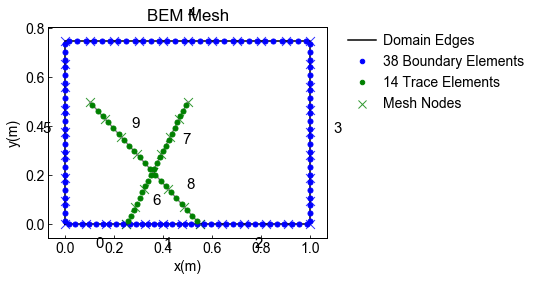

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(6, 50.0), (7, 50.0), (8, 50.0), (9, 50.0), (5, 100.0), (3, 100.0)]


In [2]:
BEM_Case1=BEMpy.BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 0.75), (0.0, 0.75)] #Anti-clock wise for internal domain
Trace_vert=[((0.25, 0.0), (0.5, 0.5)),((0.55, 0.0), (0.1, 0.5))]#No direction requirement
element_esize=0.1
element_tszie=0.1

BEM_Case1.set_Mesh(Boundary_vert,Trace_vert,[],element_esize,element_tszie,Type="Quad")
BEM_Case1.plot_Mesh()
#2.Set Boundary condition
bc_traces=[(6,50.0),(7,50.0),(8,50.0),(9,50.0)]
bc_edges=[(5,100.0),(3,100.0)]
bc0=bc_traces+bc_edges
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)
#BEM_Case1.print_debug()

#Set properties
k11=2.0
k12=0.0
k22=5.0
k_tensor=[k11,k12,k22]
BEM_Case1.SetProps(k_tensor)

[Solution] #DOFs= 156
[Visulization] Plotting Solution


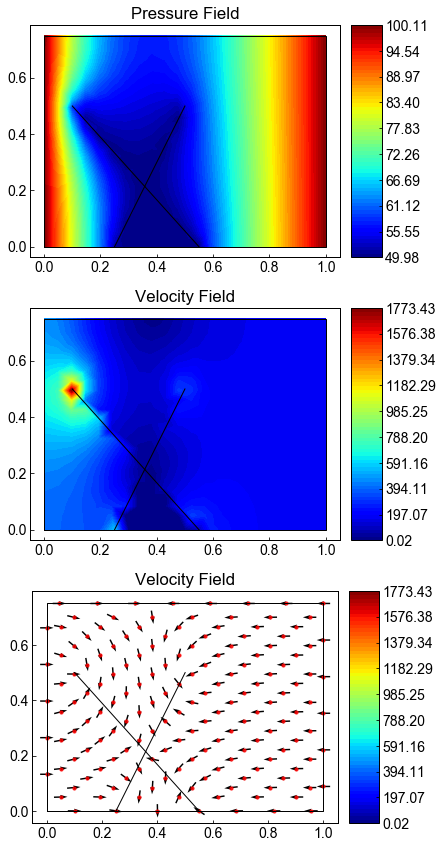

In [3]:
#3. Solve and plot
Mat=BEM_Case1.Solve()
#BEM_Case1.PostProcess.print_Solution()
PUV=BEM_Case1.PostProcess.plot_Solution()

#PUV=BEM_Case1.plot_Solution(v_range=(-77,134),p_range=(0,40))
#PUV2=BEM_Case1.plot_SolutionBD()

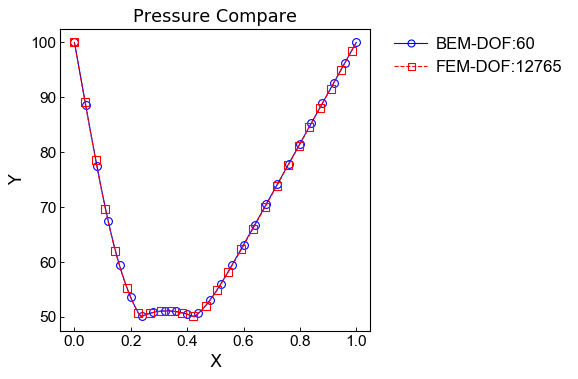

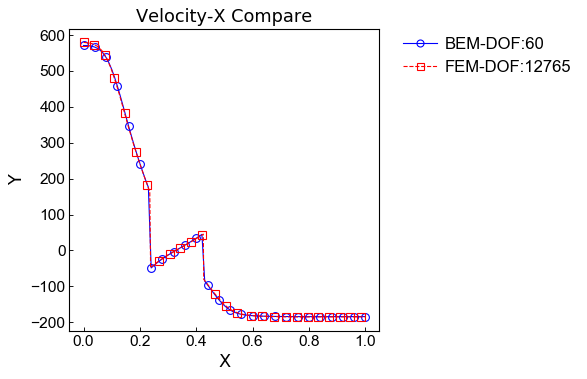

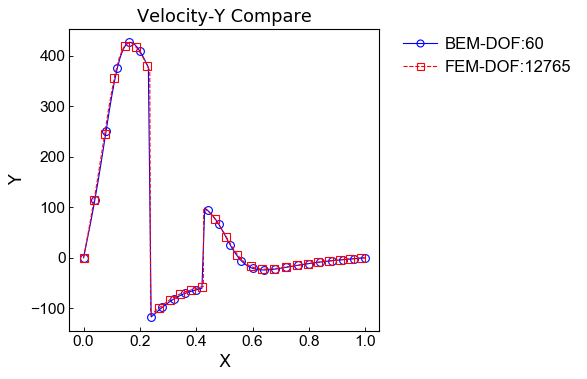

In [4]:
import numpy as np
Pts1,Pts2=(0.0,0.35),(1.0,0.35)

#BEM Solution
PUV=BEM_Case1.PostProcess.plot_Solution_overline(Pts1,Pts2,plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SimpleTraces_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SimpleTraces_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SimpleTraces_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['BEM-DOF:60','FEM-DOF:12765']
DataSetX=[PUV[:,0],P[:,0]]

DataSetY=[PUV[:,1],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetY=[PUV[:,2],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetY=[PUV[:,3],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')

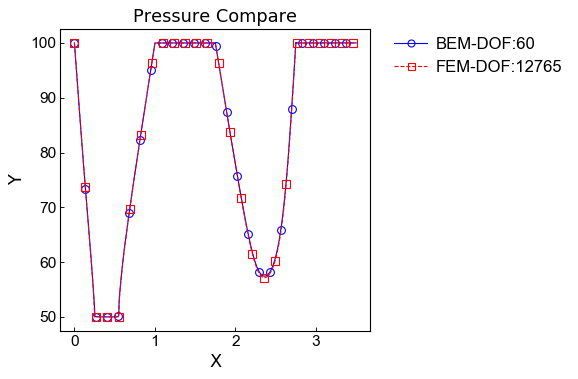

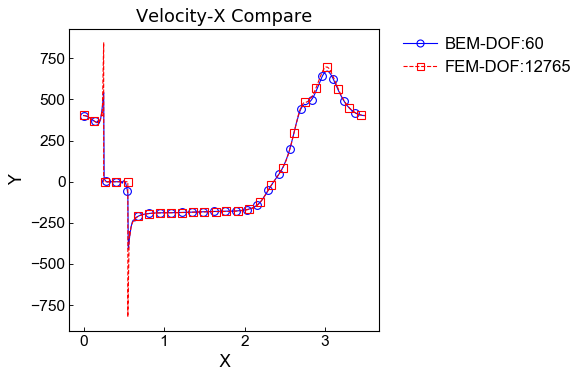

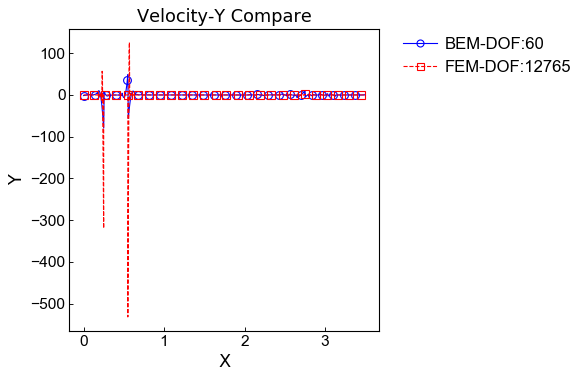

In [6]:
#BEM Solution
PUV=BEM_Case1.PostProcess.plot_SolutionBD(plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SimpleTraces_BD_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SimpleTraces_BD_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SimpleTraces_BD_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['BEM-DOF:60','FEM-DOF:12765']

DataSetX=[PUV[:,0],P[:,0]]
DataSetY=[PUV[:,1],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetX=[PUV[:,0],U[:,0]]
DataSetY=[PUV[:,2],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetX=[PUV[:,0],V[:,0]]
DataSetY=[PUV[:,3],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')

In [60]:
BEM_Case1.get_Solution((0.5,0.1))

(25.00000000469343, 60.477276879738184, 1.1308638869548887e-15)

In [11]:
BEM_Case1.get_Solution((0.5,0.1))

(23.761835739202468, 75.80187328306906, 44.92887270425936)